In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


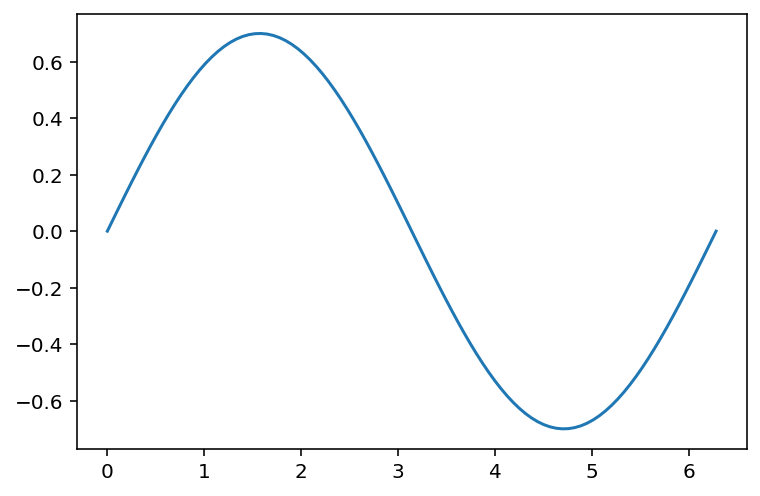

In [2]:
P = 1.3234
e = 0.7
ts = linspace(0, P, 100)
Ms = 2*pi*ts/P
plot(Ms, Ms + e*sin(Ms)-Ms)

Here is a function that solves Kepler's equation:
$$
\frac{2\pi t}{P} = E - e*\sin(E)
$$

In [5]:
def E_from_t(t, P, e, tol=1e-8):
    """Returns the eccentric anomaly given a time, period and eccentricity.
    
    :param t: The time.
    
    :param P: The period.
    
    :param e: The eccentricity.
    
    :param tol: (Optional; default 1e-8).  Accuracy to which E will be determined.
    
    :return: The eccentric anomaly.
    """
    
    assert e >= 0
    assert e < 1
    
    assert P > 0
    
    # Mean anomaly
    M = 2*pi*t/P
    
    # Kepler's equation
    def f(E):
        return E - e*sin(E) - M
    
    E0 = 0
    E1 = 2*pi
    
    F0 = f(E0)
    F1 = f(E1)
    
    while E1 > E0 + tol:
        EM = 0.5*(E0 + E1)
        FM = f(EM)
        
        if F0*FM > 0: # Check if F0 and Fm are same sign
            E0 = EM
            F0 = FM
        else:
            E1 = EM
            F1 = FM
            
    return EM            

In [6]:
E_from_t(0, P, e, tol=1e-30)

6.195699061366312e-31

In [7]:
1.0 + 1e-15

1.000000000000001

In [8]:
E_from_t(P, P, e)

6.283185301327914

In [9]:
E_from_t(P/2, P, e)

3.141592647738121

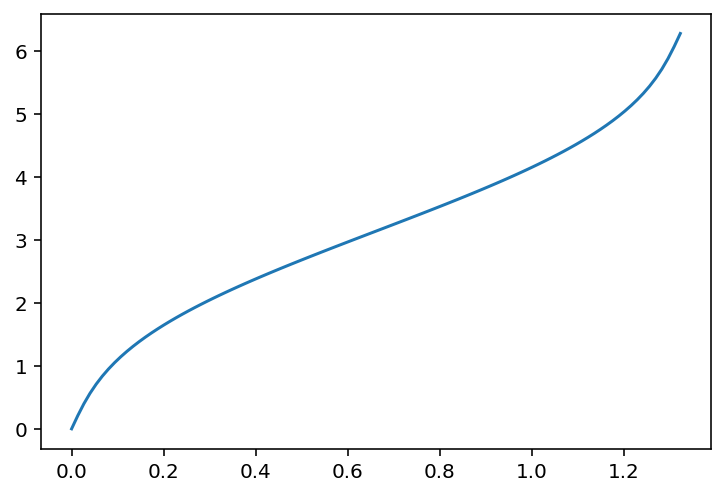

In [10]:
ts = linspace(0, P, 100)
Es = [E_from_t(t, P, e) for t in ts]
plot(ts, Es)

In [11]:
rand()

0.3770371430846261

In [12]:
P = rand()
e = rand()
t = P*rand()

E = E_from_t(t, P, e)

print(E - e*sin(E) - 2*pi*t/P)

-5.6085336375133465e-09
